In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

import itertools
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [2]:
df = pd.read_csv('Data/model_data_4.csv',index_col=0)
df['2018':]

,90044,90805,90650,90201,90011,90255,91706,91766,91744,90813,...,90606,91768,90061,90222,91746,90304,90270,90670,90716,90040
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,409700.0,451700.0,476600.0,432900.0,374200.0,432600.0,454000.0,407200.0,467000.0,440400.0,...,479500.0,407800.0,382900.0,369500.0,468500.0,481500.0,409400.0,487000.0,431000.0,433600.0
2018-02-01,414300.0,455000.0,479300.0,435400.0,376300.0,435200.0,457500.0,409700.0,469900.0,444900.0,...,482200.0,410800.0,384700.0,371600.0,471600.0,486500.0,410600.0,489600.0,436200.0,436000.0
2018-03-01,418500.0,457600.0,481200.0,437200.0,378000.0,436300.0,461600.0,411900.0,471400.0,448800.0,...,483600.0,412900.0,384400.0,374000.0,473600.0,490900.0,411300.0,491400.0,438700.0,438200.0
2018-04-01,421100.0,459100.0,481800.0,437400.0,377800.0,436200.0,463800.0,412900.0,471800.0,452000.0,...,483500.0,413400.0,383600.0,375600.0,474300.0,494300.0,411900.0,491800.0,438300.0,439500.0


In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 1996-04-01 to 2018-04-01
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   90044   265 non-null    float64
 1   90805   265 non-null    float64
 2   90650   265 non-null    float64
 3   90201   265 non-null    float64
 4   90011   265 non-null    float64
 5   90255   265 non-null    float64
 6   91706   265 non-null    float64
 7   91766   265 non-null    float64
 8   91744   265 non-null    float64
 9   90813   265 non-null    float64
 10  91702   265 non-null    float64
 11  90022   265 non-null    float64
 12  90037   265 non-null    float64
 13  90660   265 non-null    float64
 14  90723   265 non-null    float64
 15  90262   265 non-null    float64
 16  91767   265 non-null    float64
 17  90001   265 non-null    float64
 18  90220   265 non-null    float64
 19  90002   265 non-null    float64
 20  90221   265 non-null    float64
 21  90023   265 non-null

# Checking if data is stationary

In [13]:
def rolling(df): 
    rolling_mean = df.rolling(window=12).mean()
    rolling_std = df.rolling(window=12).std()
    fig = plt.figure(figsize=(12,6))
    plt.plot(df, color='blue',label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    return None

90044


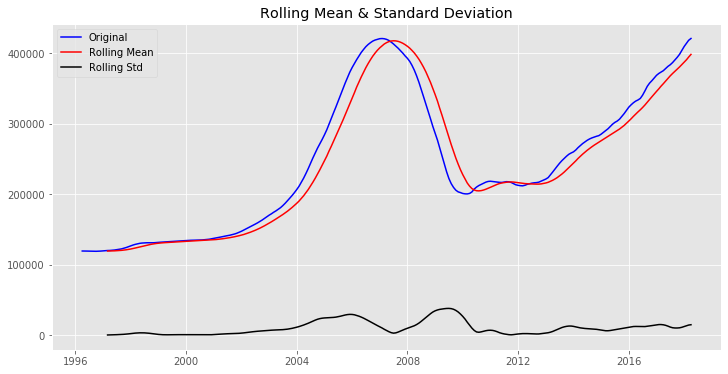

90805


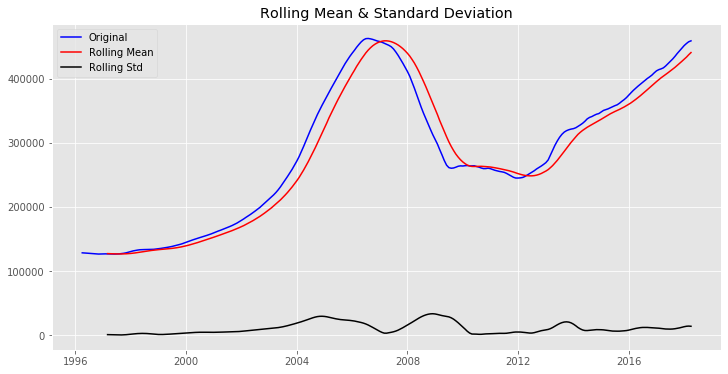

90650


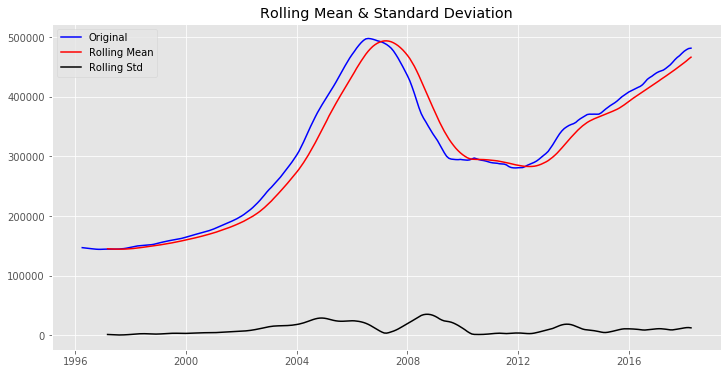

90201


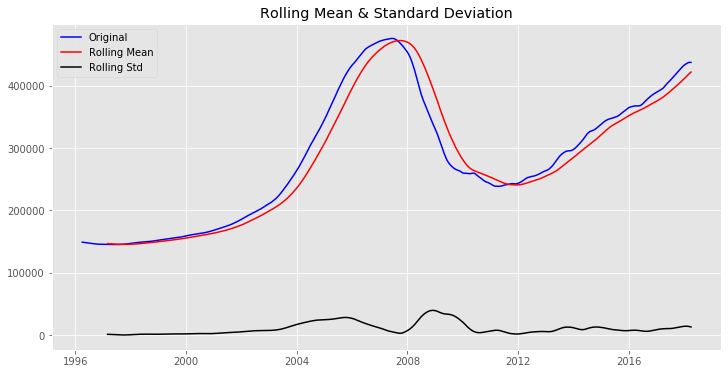

90011


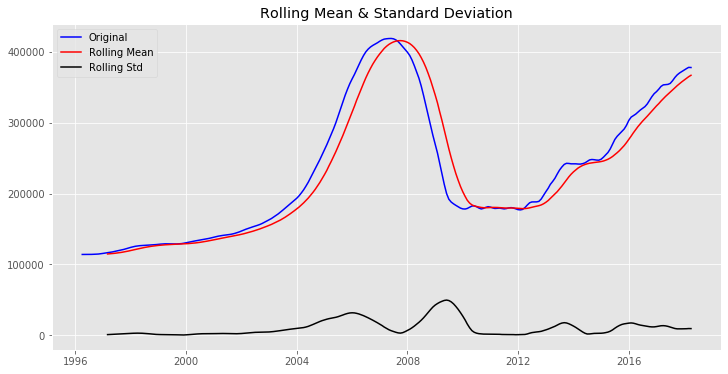

90255


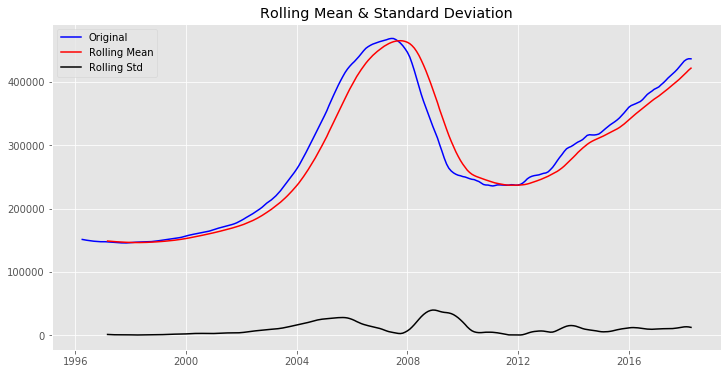

91706


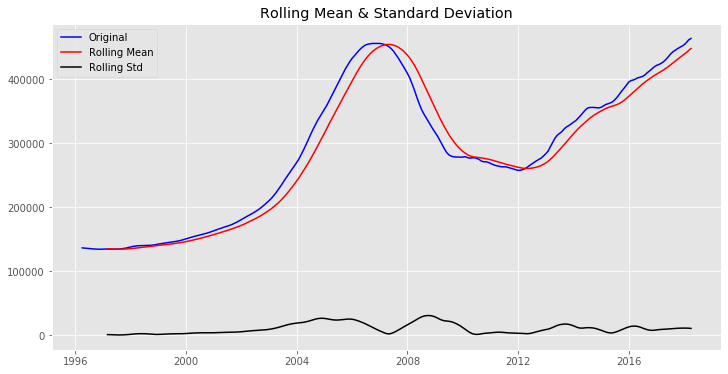

91766


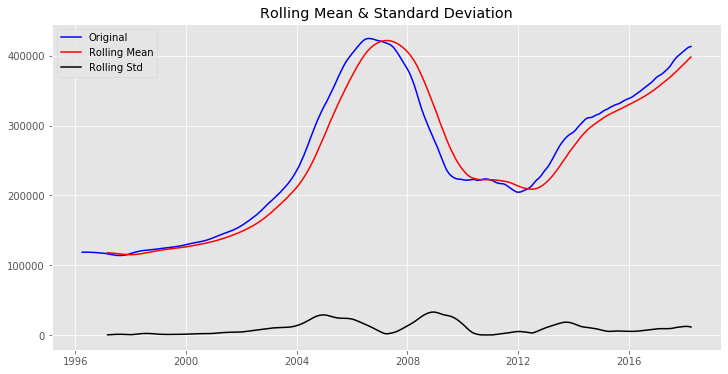

91744


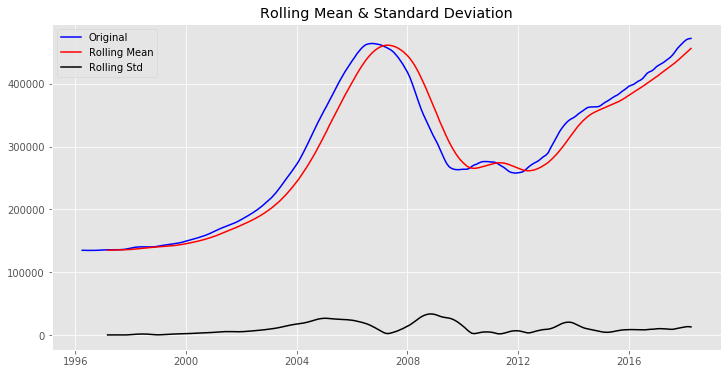

90813


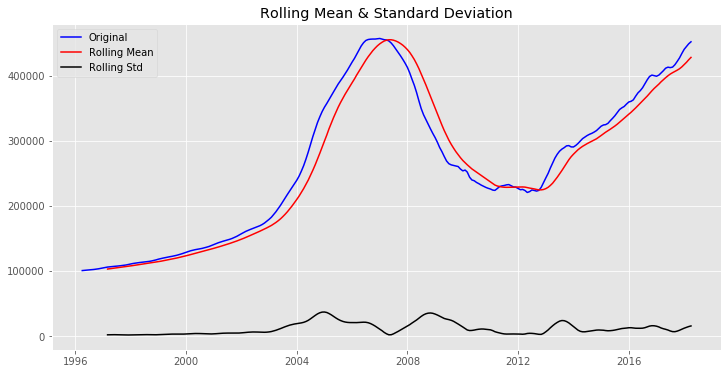

91702


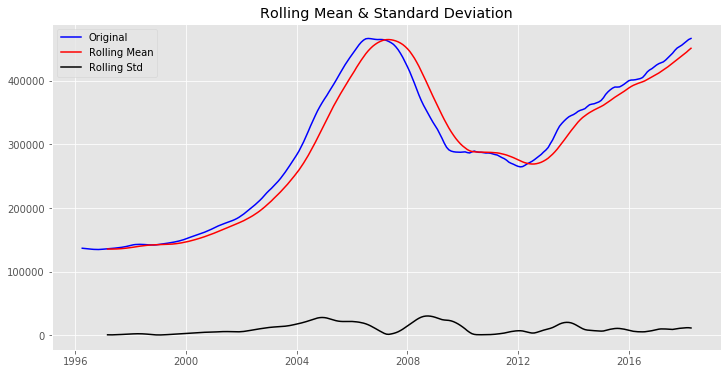

90022


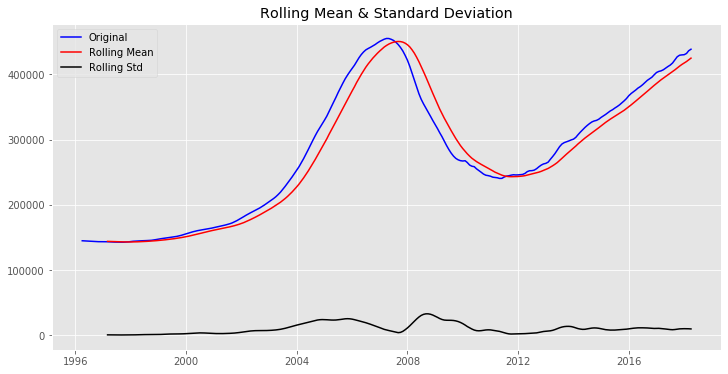

90037


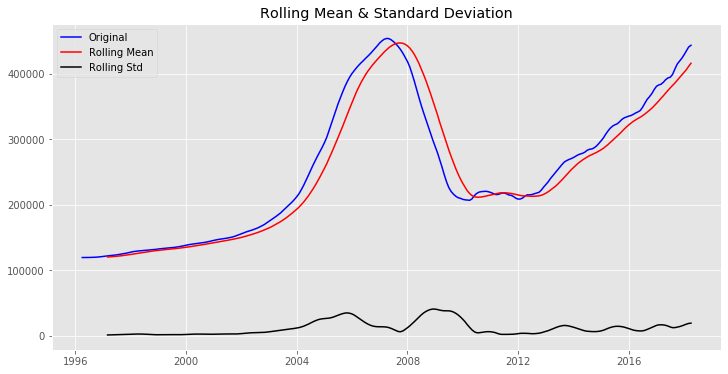

90660


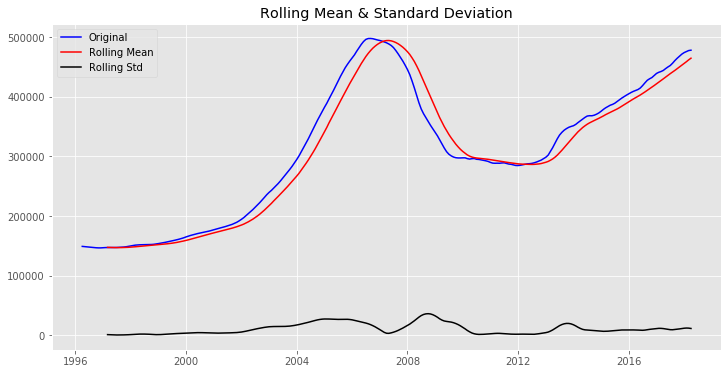

90723


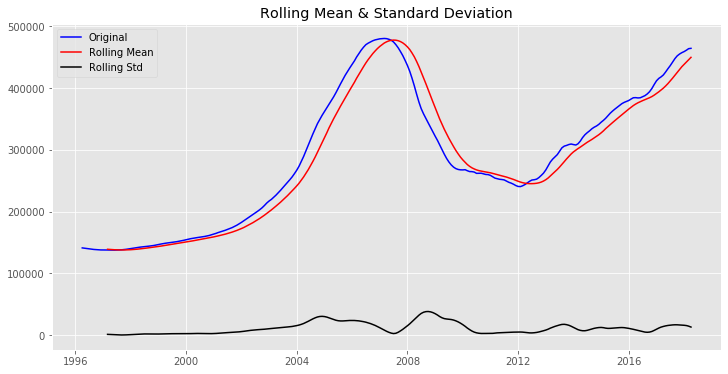

90262


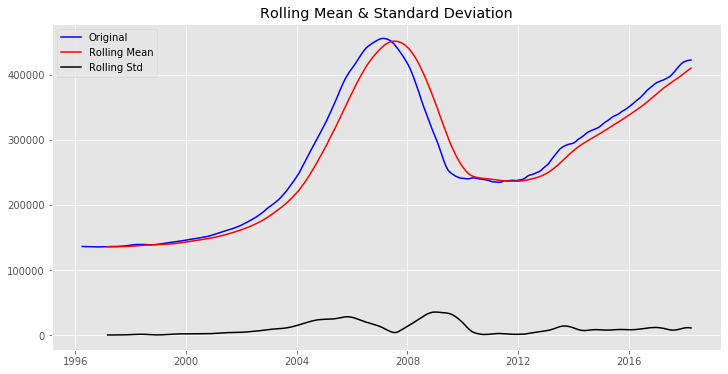

91767


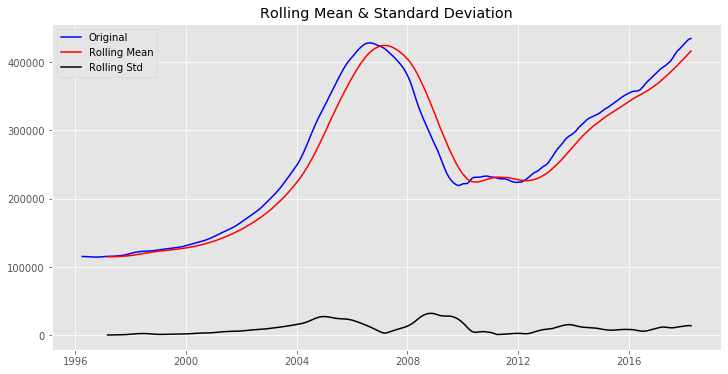

90001


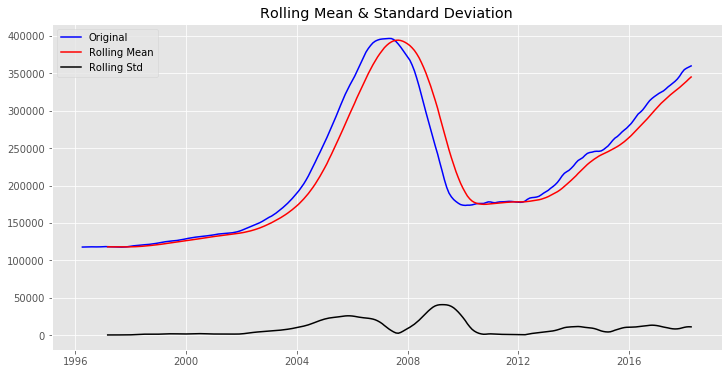

90220


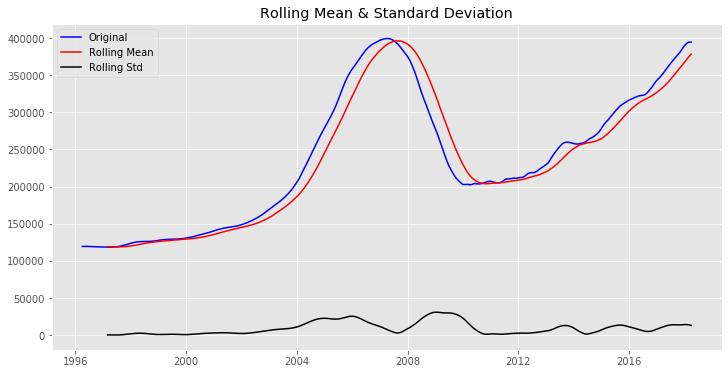

90002


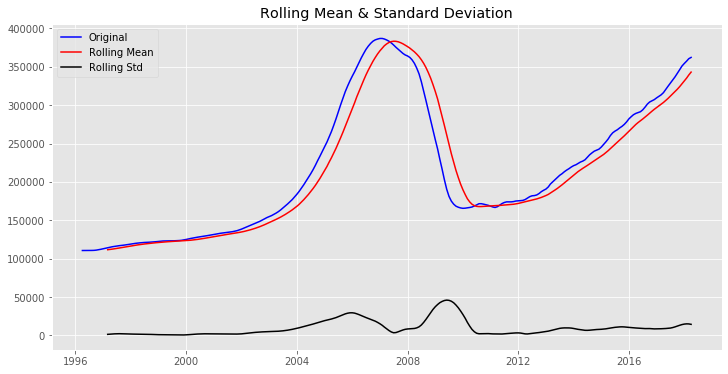

90221


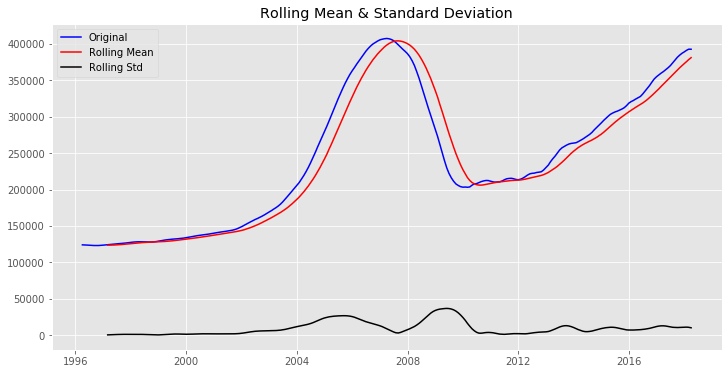

90023


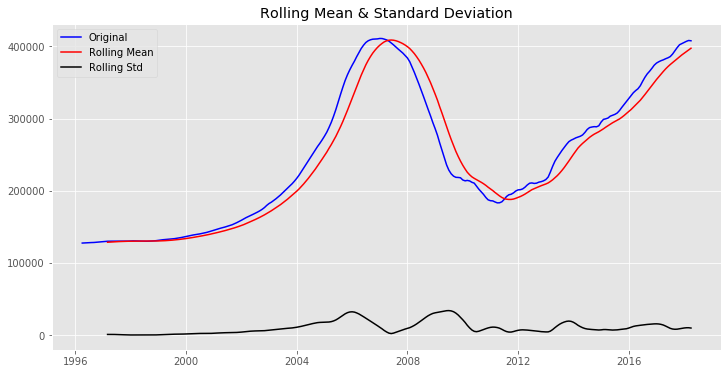

91722


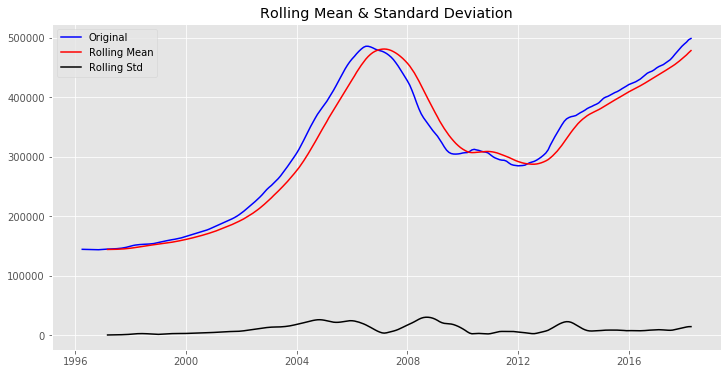

91351


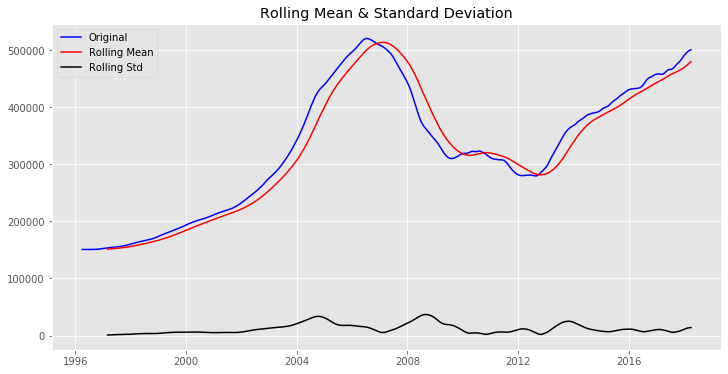

90059


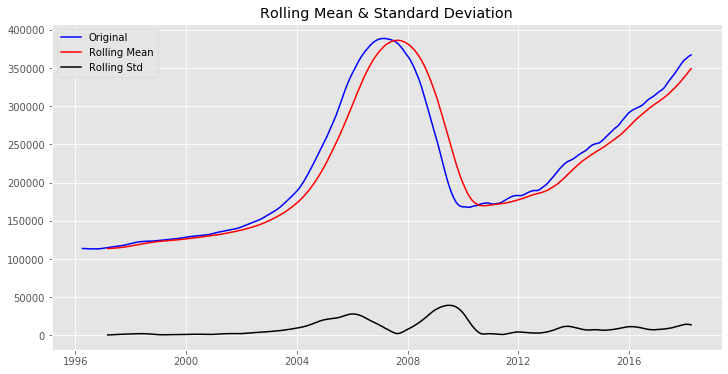

90810


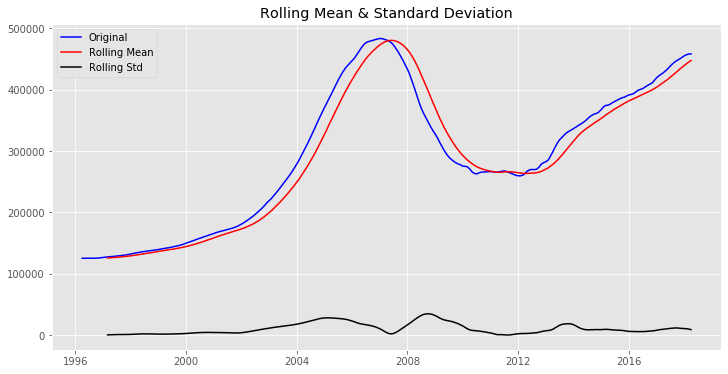

90606


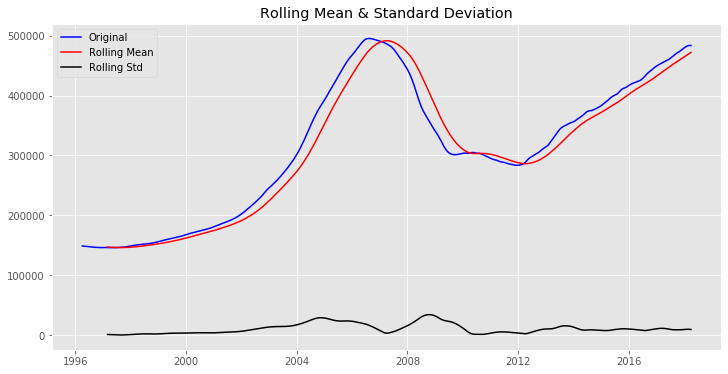

91768


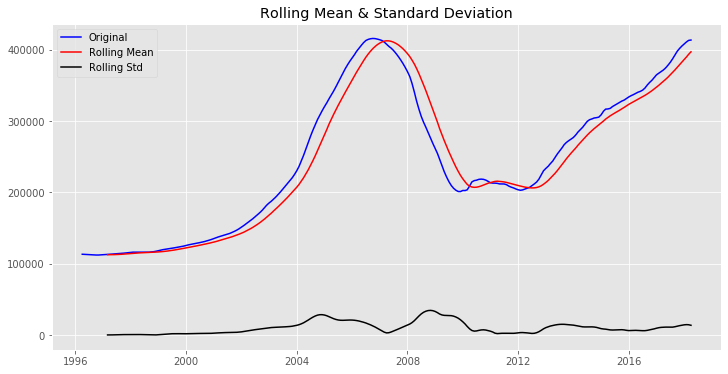

90061


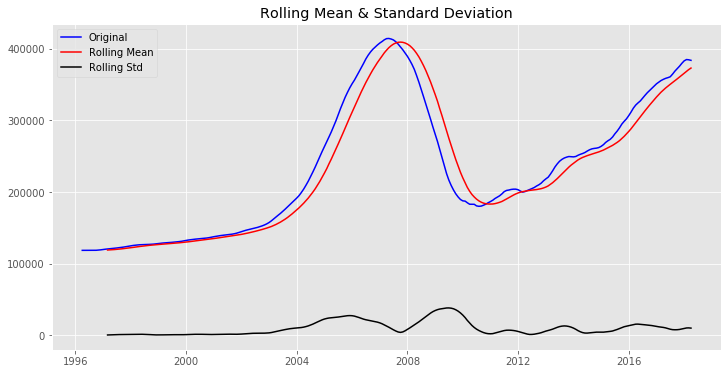

90222


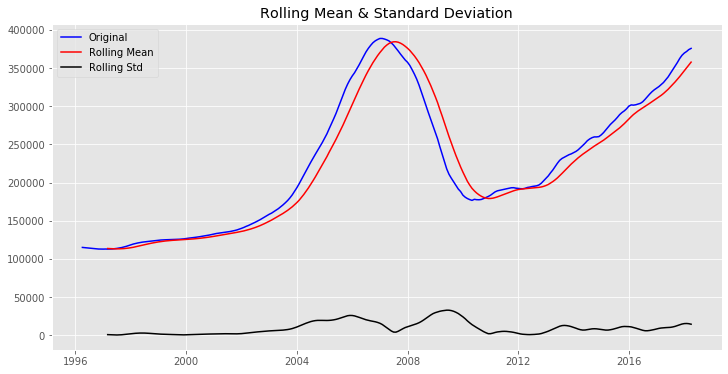

91746


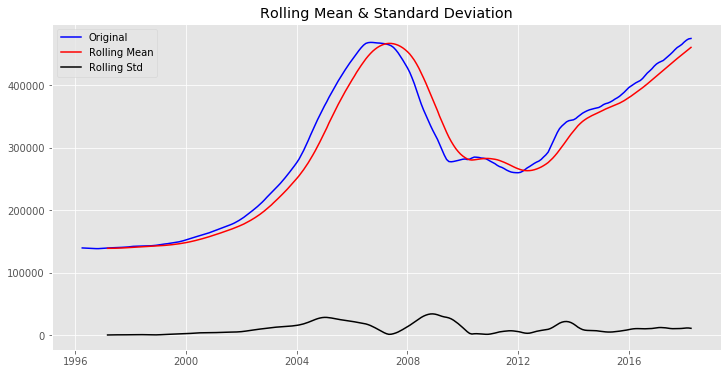

90304


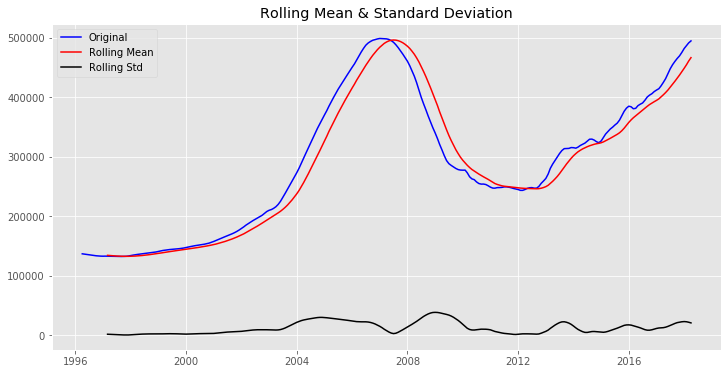

90270


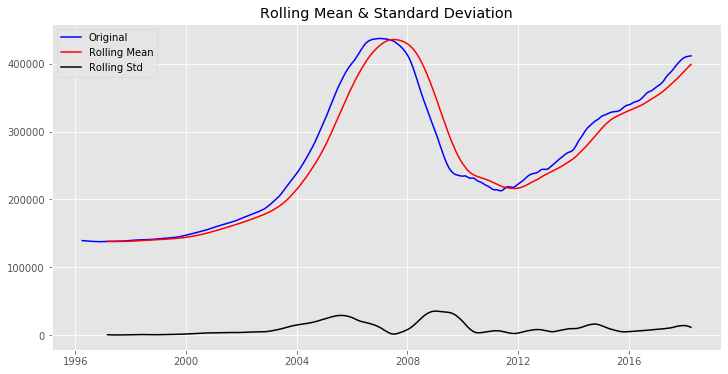

90670


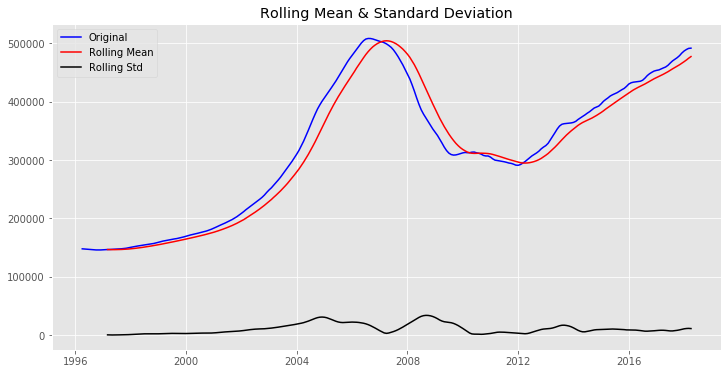

90716


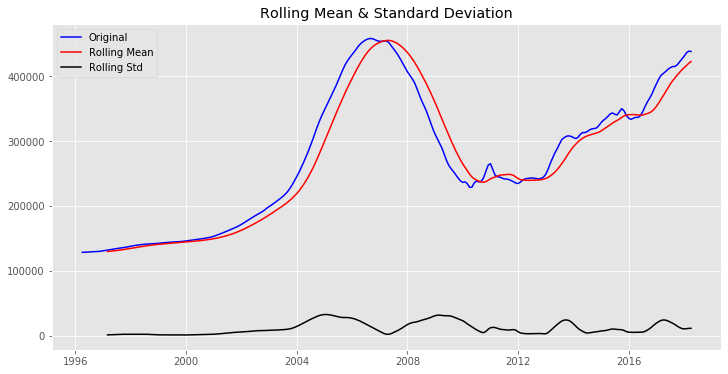

90040


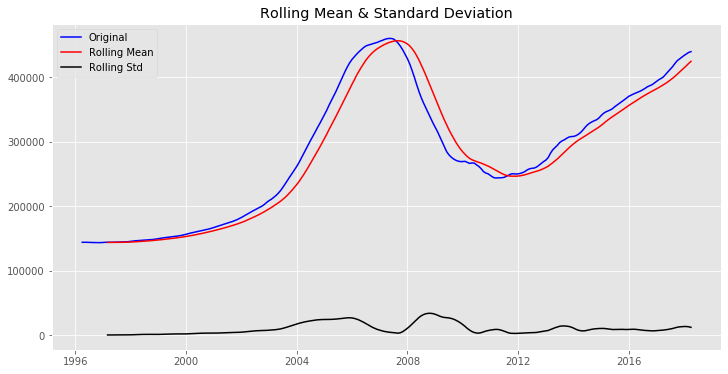

In [14]:
for col in df.columns:
    print(f"{col}")
    rolling(df[col])

# Choosing Parameters

In [5]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(1,4)
d = range(1,2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df['90304'],
                                                    order=comb,
                                                    seasonal_order=combs,
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {} x 12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic']==min(ans_df['aic'])]

ARIMA (1, 1, 1) x (1, 1, 1, 12) x 12 : AIC Calculated =4140.275521272535
ARIMA (1, 1, 1) x (1, 1, 2, 12) x 12 : AIC Calculated =3843.4429385677277
ARIMA (1, 1, 1) x (1, 1, 3, 12) x 12 : AIC Calculated =3670.36501161277
ARIMA (1, 1, 1) x (2, 1, 1, 12) x 12 : AIC Calculated =3897.2905499149333
ARIMA (1, 1, 1) x (2, 1, 2, 12) x 12 : AIC Calculated =3841.9970186681703
ARIMA (1, 1, 1) x (2, 1, 3, 12) x 12 : AIC Calculated =3666.78368245298
ARIMA (1, 1, 1) x (3, 1, 1, 12) x 12 : AIC Calculated =3670.074445262984
ARIMA (1, 1, 1) x (3, 1, 2, 12) x 12 : AIC Calculated =3679.1802501405664
ARIMA (1, 1, 1) x (3, 1, 3, 12) x 12 : AIC Calculated =3672.937955584948
ARIMA (1, 1, 2) x (1, 1, 1, 12) x 12 : AIC Calculated =4099.738133469229
ARIMA (1, 1, 2) x (1, 1, 2, 12) x 12 : AIC Calculated =3819.016831890667
ARIMA (1, 1, 2) x (1, 1, 3, 12) x 12 : AIC Calculated =3697.4276535421336
ARIMA (1, 1, 2) x (2, 1, 1, 12) x 12 : AIC Calculated =3909.5279165154966
ARIMA (1, 1, 2) x (2, 1, 2, 12) x 12 : AIC Calc

,pdq,pdqs,aic
47,"(2, 1, 3)","(1, 1, 3, 12)",3605.298976


In [6]:
# Find the parameters with minimal AIC value
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
r= ans_df.loc[ans_df['aic'].idxmin()]

In [7]:
r['pdq']

(2, 1, 3)

# Building Model

Running Model for all Zipcodes that fit criteria

In [8]:
predictiondf = pd.DataFrame()
rmsedict = {}
msedict = {}

for col in df.columns:

        # Plug the optimal parameter values into a new SARIMAX model
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df[col],
                                                     order=r['pdq'],
                                                seasonal_order=r['pdqs'],
                                                    enforce_stationarity=False,enforce_invertibility=False)

        # Fit the model and print results
    output = ARIMA_MODEL.fit()
        # Get predictions starting 
    pred = output.get_prediction(start=pd.to_datetime('2000-04-01'),end = pd.to_datetime('2021-04-01'),dynamic=False)


        # Get the real and predicted values
    forecasted = pred.predicted_mean
    truth = df[col]['2000-04-01':]

    predictiondf[col] = forecasted
        
        # Compute the mean square error
    mse = ((forecasted - truth)**2).mean()
    rmse= np.sqrt(mse)
   
    rmsedict[col] = rmse
    msedict[col] = mse


In [9]:
rmsedict

{'90044': 551.885087375268,
 '90805': 610.2800825857964,
 '90650': 689.1757963834941,
 '90201': 691.3019847461012,
 '90011': 673.1589190419553,
 '90255': 761.5230028459579,
 '91706': 808.6388688262092,
 '91766': 713.3685093704872,
 '91744': 569.3982002526768,
 '90813': 1077.0726801266017,
 '91702': 1061.9133449387432,
 '90022': 711.4834745458115,
 '90037': 952.6585314012202,
 '90660': 768.1919495962723,
 '90723': 686.36534949313,
 '90262': 495.5292568356538,
 '91767': 544.4077517630868,
 '90001': 501.5707567198477,
 '90220': 584.1673350582942,
 '90002': 564.8123990533087,
 '90221': 524.3468934751353,
 '90023': 899.7018507839434,
 '91722': 557.7879814477126,
 '91351': 749.3512160771045,
 '90059': 460.34905099862397,
 '90810': 705.4643063592102,
 '90606': 599.3444470981749,
 '91768': 708.8570642073648,
 '90061': 1364.17680867149,
 '90222': 642.0690209534936,
 '91746': 603.4505287196655,
 '90304': 1071.1078946886776,
 '90270': 729.8071467001664,
 '90670': 1416.5939732562556,
 '90716': 164

In [10]:
rmse = pd.DataFrame.from_dict(rmsedict,orient='index')
rmse.rename({0:'RMSE'},axis=1,inplace=True)

In [11]:
ROI = predictiondf.T

In [12]:
predictiondf

,90044,90805,90650,90201,90011,90255,91706,91766,91744,90813,...,90606,91768,90061,90222,91746,90304,90270,90670,90716,90040
2000-04-01,134566.065251,148611.073989,167571.142651,160951.140032,131807.226091,159623.728012,153442.668463,133089.385036,152718.132333,133393.566409,...,170701.142519,128421.021931,137192.697134,128330.351151,155264.048420,150313.985132,149510.131691,176117.816401,146420.820236,159938.885374
2000-05-01,134291.962730,147389.679180,165903.584017,160194.107296,131750.914803,155736.265556,150327.481155,128317.606922,153180.392580,130262.336522,...,170167.693398,127475.995307,132492.525724,127191.767995,155927.973661,148342.709403,148775.881863,172496.806107,149246.309606,158472.262351
2000-06-01,134798.743194,150287.934255,171396.548104,162473.765073,133570.332768,163073.014531,153616.885256,131895.531241,153827.040747,131997.992873,...,172959.810369,127752.545471,131317.825946,129138.931829,158090.864983,149087.338402,151801.024018,171201.851051,144429.416307,159472.613728
2000-07-01,135419.669336,152373.084842,171187.772373,163312.841453,134913.060830,160825.906838,156610.525305,134111.424627,156074.847308,134231.942508,...,174140.214995,130547.208811,133926.792779,128990.217973,159434.721634,152123.561136,153126.567183,174232.966231,151646.495209,161948.802450
2000-08-01,135147.846097,153278.482819,172076.006346,163109.755253,134551.676472,161826.936782,157272.811879,134000.835119,156981.785285,134235.678066,...,174979.576406,130160.675774,137566.290646,129440.600293,160254.727378,152396.732788,152884.261765,178405.889822,148342.482026,162522.671695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,452054.517414,490733.440396,496055.625582,425019.963505,359560.766563,408837.119019,469250.111195,398810.553597,489656.327248,533935.042726,...,477286.325003,448884.836820,391433.714816,403868.715078,489577.817725,596745.841838,444328.451416,480541.158688,509404.973623,469513.972813
2021-01-01,453749.055708,491856.751594,496648.813035,425781.482923,360321.944522,408851.899745,468830.159363,397791.373119,490709.047191,536281.394906,...,477630.622436,450408.793693,394386.381773,405097.844797,490755.881977,600112.575856,445473.960310,485213.187842,512114.171235,470800.732160
2021-02-01,455276.188048,492917.932599,497308.789395,426430.026894,361113.907740,408360.718732,469410.898088,396509.197061,491634.500421,538557.740498,...,477759.559805,451997.082376,396687.130374,406136.608521,491883.108829,602887.982135,446545.445877,488831.145360,515418.517378,472011.806445
2021-03-01,456721.820079,493972.866090,498107.244911,426979.892316,361687.964041,407535.235570,470692.720242,395030.824564,492441.533160,541051.101120,...,477356.030843,453289.288786,398023.386376,407108.015352,492951.958397,605884.310288,447684.420246,491736.142060,517909.154102,473109.582319


In [13]:
ROI['ROI'] = (ROI['2021-04-01'] -ROI['2018-04-01']*1.0468)/(ROI['2018-04-01']*1.0468)

In [14]:
ROI = ROI['ROI']

In [15]:
ROI =ROI.reset_index()
ROI.rename({'index':'zipcode'},axis=1,inplace = True)

In [16]:
rmse = rmse.reset_index()
rmse.rename({'index':'zipcode'},axis=1,inplace=True)

In [17]:
zips = pd.merge(rmse,ROI,on='zipcode')

In [18]:
zips.sort_values(by='ROI',ascending=False)

,zipcode,RMSE,ROI
12,90037,952.658531,0.196507
31,90304,1071.107895,0.172382
9,90813,1077.072680,0.146465
34,90716,1644.888222,0.130172
17,90001,501.570757,0.104096
27,91768,708.857064,0.047930
32,90270,729.807147,0.040692
11,90022,711.483475,0.037174
29,90222,642.069021,0.036483
0,90044,551.885087,0.035294


In [19]:
zips =zips.loc[zips['RMSE']<1100]

In [20]:
finalzipcodes = zips.sort_values(by='ROI',ascending=False)
finalzipcodes

,zipcode,RMSE,ROI
12,90037,952.658531,0.196507
31,90304,1071.107895,0.172382
9,90813,1077.072680,0.146465
17,90001,501.570757,0.104096
27,91768,708.857064,0.047930
32,90270,729.807147,0.040692
11,90022,711.483475,0.037174
29,90222,642.069021,0.036483
0,90044,551.885087,0.035294
23,91351,749.351216,0.029051


In [21]:
finalzips = list(finalzipcodes['zipcode'].values)[:5]

In [22]:
df2 = df[finalzips]

In [23]:
df2

,90037,90304,90813,90001,91768
Date,,,,,
1996-04-01,119300.0,136600.0,100500.0,117700.0,113400.0
1996-05-01,119300.0,136100.0,100900.0,117800.0,113200.0
1996-06-01,119400.0,135600.0,101200.0,117900.0,112900.0
1996-07-01,119400.0,135000.0,101500.0,117900.0,112700.0
1996-08-01,119500.0,134400.0,101900.0,118000.0,112500.0
...,...,...,...,...,...
2017-12-01,423900.0,474900.0,434000.0,351000.0,404900.0
2018-01-01,429500.0,481500.0,440400.0,354900.0,407800.0
2018-02-01,435600.0,486500.0,444900.0,356900.0,410800.0


For Calculating ROI I will assume inflation of 1.5% per year from 2018 to 2021

# Modelling the chosen Zip Codes

Building model for 90037

>>>>>>>>>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4574      0.079      5.806      0.000       0.303       0.612
ar.L2          0.4862      0.069      6.995      0.000       0.350       0.622
ma.L1          1.3121      0.086     15.337      0.000       1.144       1.480
ma.L2          0.3505      0.137      2.568      0.010       0.083       0.618
ma.L3         -0.3420      0.078     -4.400      0.000      -0.494      -0.190
ar.S.L12      -0.5237      0.114     -4.609      0.000      -0.746      -0.301
ma.S.L12       2.2658      0.568      3.986      0.000       1.152       3.380
ma.S.L24       3.2810      1.500      2.188      0.029       0.342       6.220
ma.S.L36      -3.0908      0.859     -3.599      0.000      -4.774      -1.407
sigma2      3.137e+04   2.02e+04      1.552      0.121   -8234.455     7.1e+04


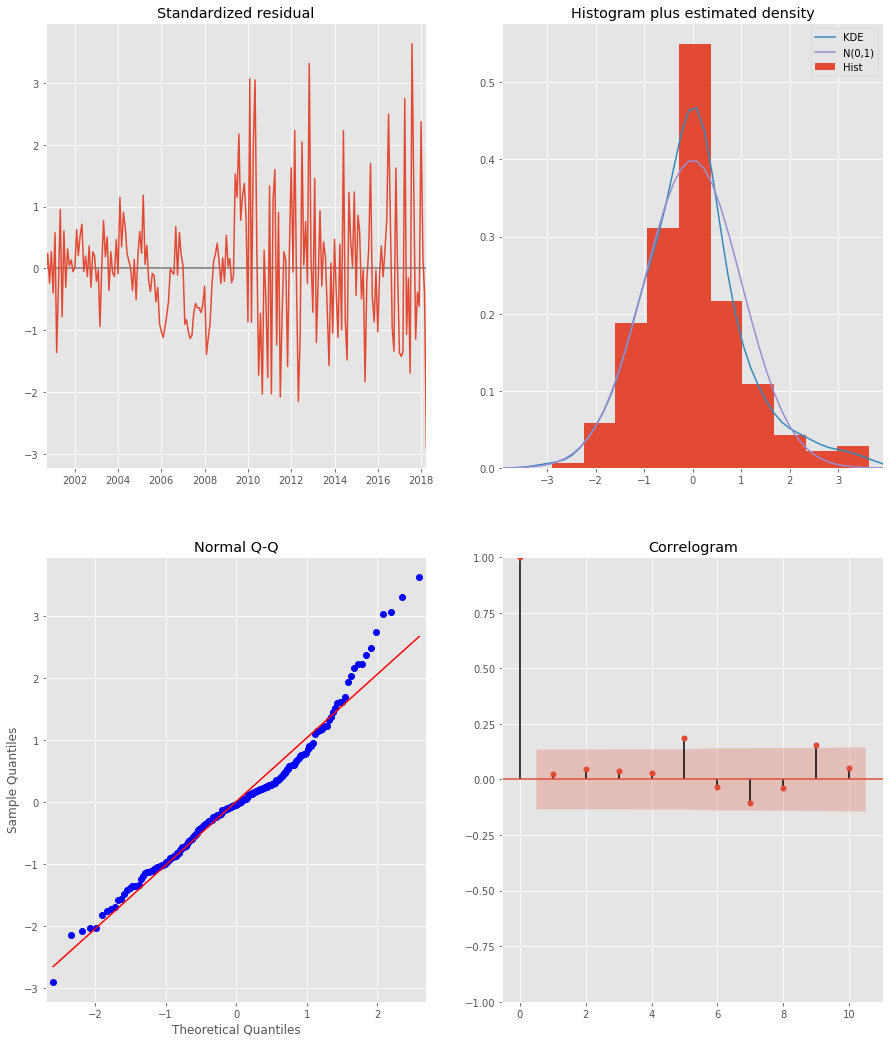

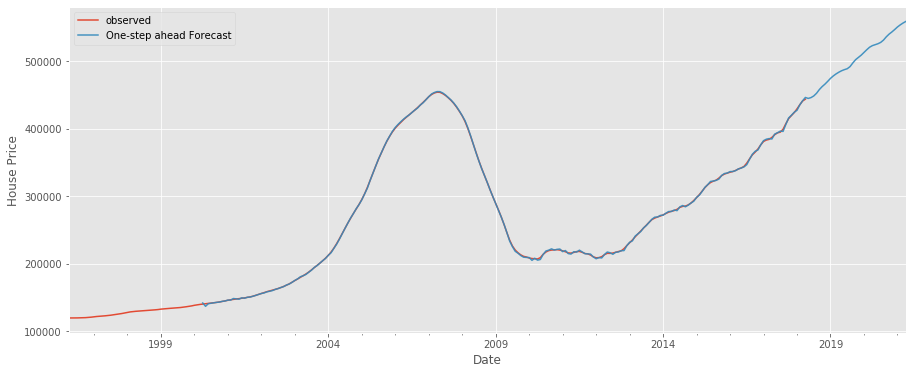

The Mean Squared error of our forecast is 907558.28

The Root Mean Squared error of our forecast is 952.66

The home value currently is 443800.0

The predicted home value in 3 years is 559103.8620979402

The predicted ROI in 3 years is 20.35%


 ------------------------------------------------------------------------ 
 
 
Building model for 90304

>>>>>>>>>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8102      0.221      3.665      0.000       0.377       1.243
ar.L2          0.1591      0.208      0.764      0.445      -0.249       0.567
ma.L1          0.9638      0.192      5.025      0.000       0.588       1.340
ma.L2         -0.0021      0.222     -0.009      0.993      -0.437       0.433
ma.L3         -0.4601      0.116     -3.971      0.000      -0.687      -0.233
ar.S.L12       0.1683      0.195      0.862      0.389      -0.214       0.551
ma.S

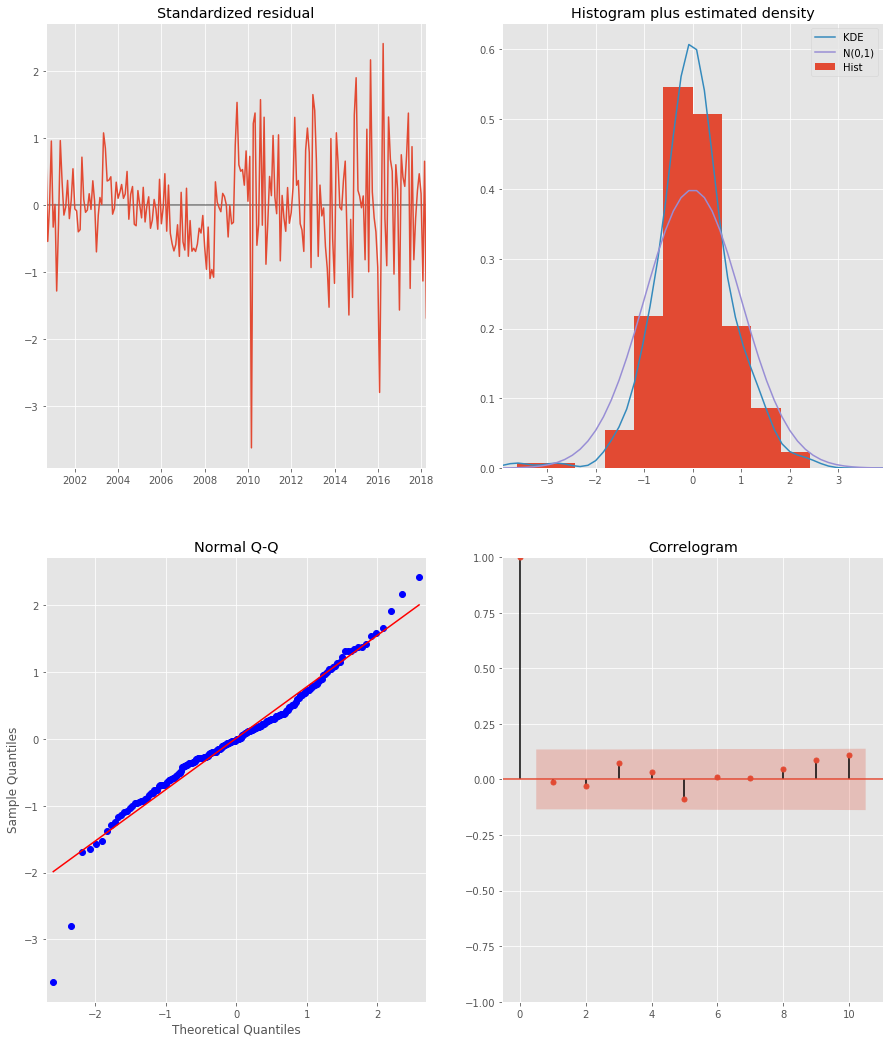

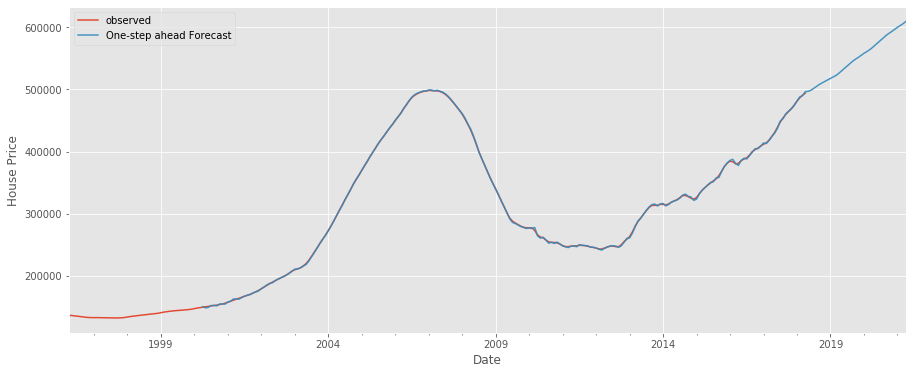

The Mean Squared error of our forecast is 1147272.12

The Root Mean Squared error of our forecast is 1071.11

The home value currently is 494300.0

The predicted home value in 3 years is 609484.7691675938

The predicted ROI in 3 years is 17.79%


 ------------------------------------------------------------------------ 
 
 
Building model for 90813

>>>>>>>>>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9546      0.341      2.796      0.005       0.285       1.624
ar.L2          0.0180      0.324      0.056      0.956      -0.616       0.652
ma.L1          0.8656      0.343      2.523      0.012       0.193       1.538
ma.L2         -0.2585      0.347     -0.744      0.457      -0.939       0.422
ma.L3         -0.3408      0.118     -2.881      0.004      -0.573      -0.109
ar.S.L12       0.2315      0.200      1.159      0.246      -0.160       0.623
ma

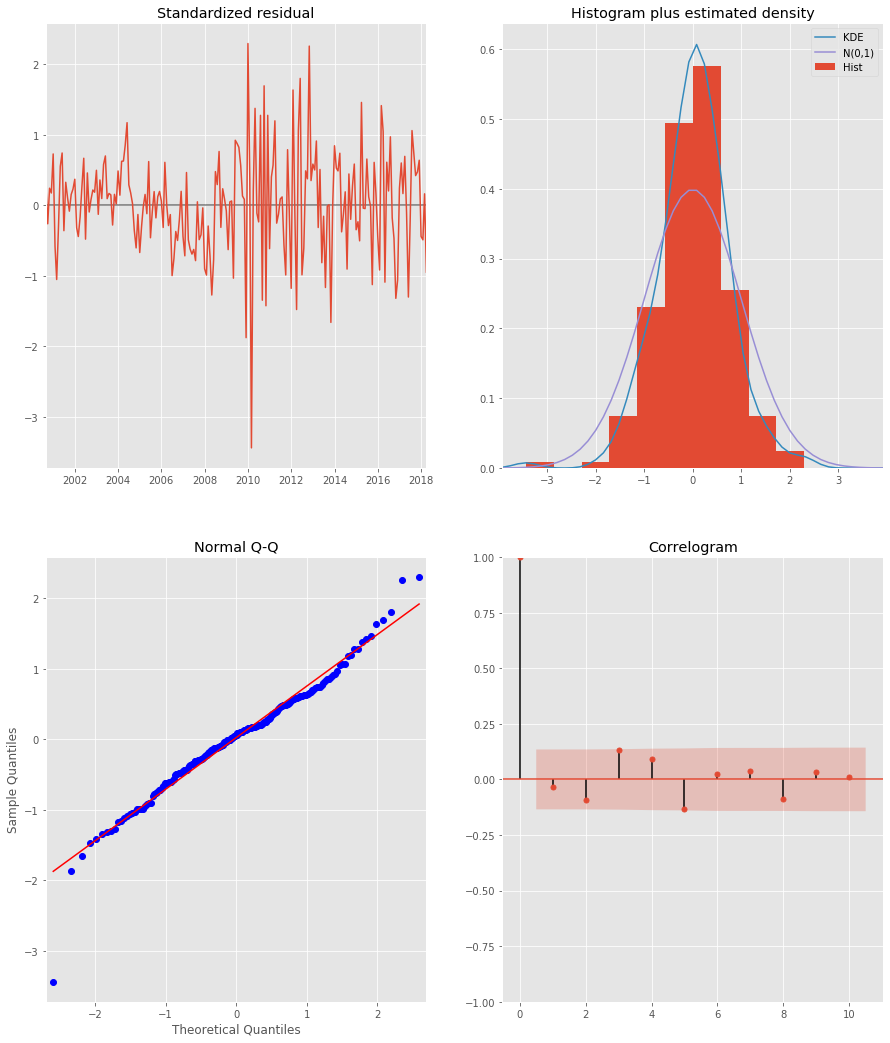

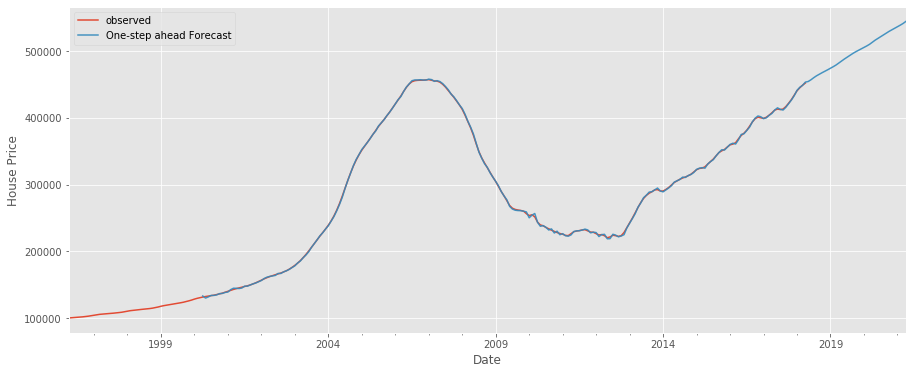

The Mean Squared error of our forecast is 1160085.56

The Root Mean Squared error of our forecast is 1077.07

The home value currently is 452000.0

The predicted home value in 3 years is 544096.11674626

The predicted ROI in 3 years is 14.99%


 ------------------------------------------------------------------------ 
 
 
Building model for 90001

>>>>>>>>>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7963      0.450      1.769      0.077      -0.086       1.679
ar.L2          0.1781      0.434      0.410      0.682      -0.673       1.030
ma.L1          1.0772      0.451      2.388      0.017       0.193       1.961
ma.L2          0.4155      0.481      0.863      0.388      -0.528       1.359
ma.L3         -0.1458      0.242     -0.603      0.546      -0.619       0.328
ar.S.L12       0.0332      0.259      0.128      0.898      -0.474       0.540
ma.S

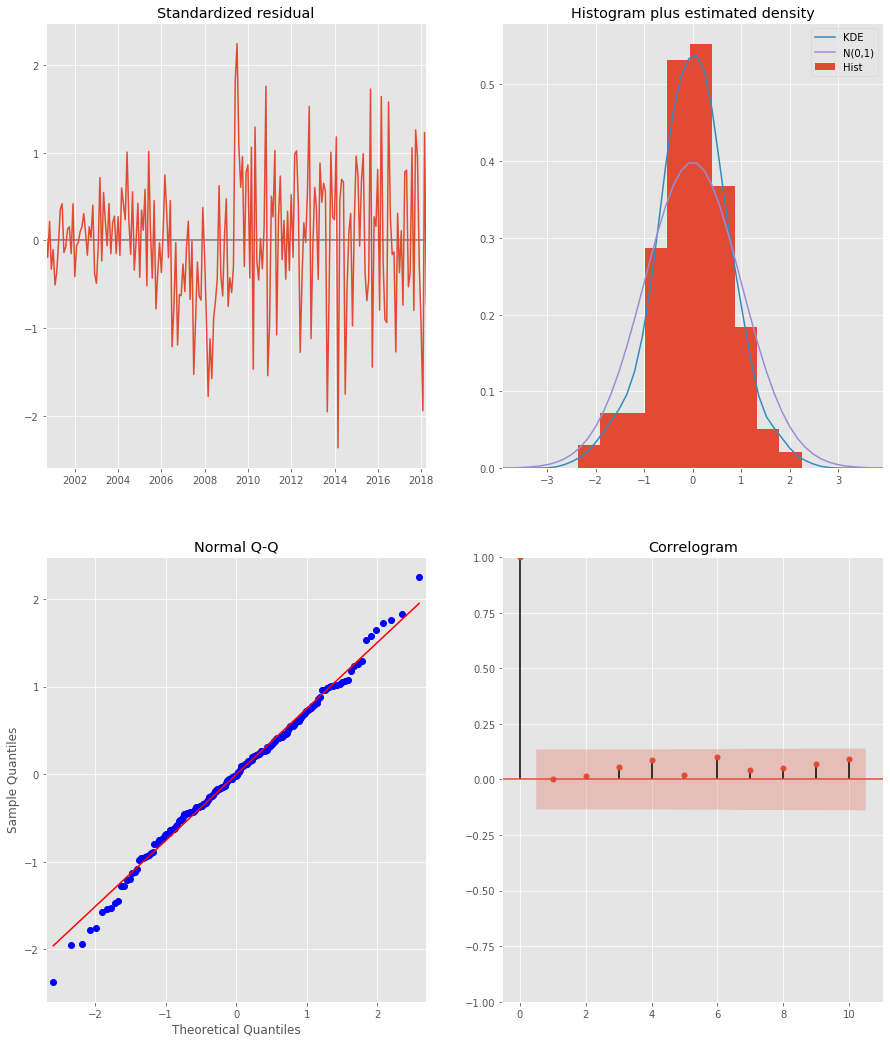

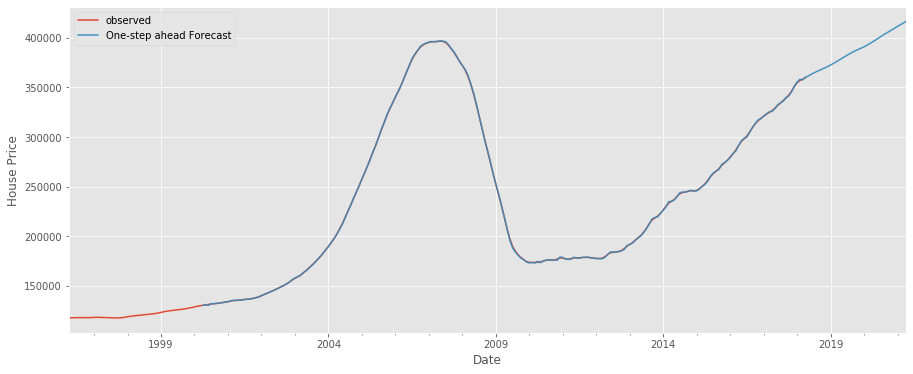

The Mean Squared error of our forecast is 251573.22

The Root Mean Squared error of our forecast is 501.57

The home value currently is 359900.0

The predicted home value in 3 years is 416514.6738095915

The predicted ROI in 3 years is 10.56%


 ------------------------------------------------------------------------ 
 
 
Building model for 91768

>>>>>>>>>>>>>
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8029      0.270      2.975      0.003       0.274       1.332
ar.L2          0.1636      0.243      0.673      0.501      -0.312       0.640
ma.L1          1.0502      0.273      3.854      0.000       0.516       1.584
ma.L2          0.1161      0.309      0.376      0.707      -0.490       0.722
ma.L3         -0.3598      0.141     -2.543      0.011      -0.637      -0.082
ar.S.L12       0.1969      0.223      0.884      0.376      -0.240       0.633
ma.S

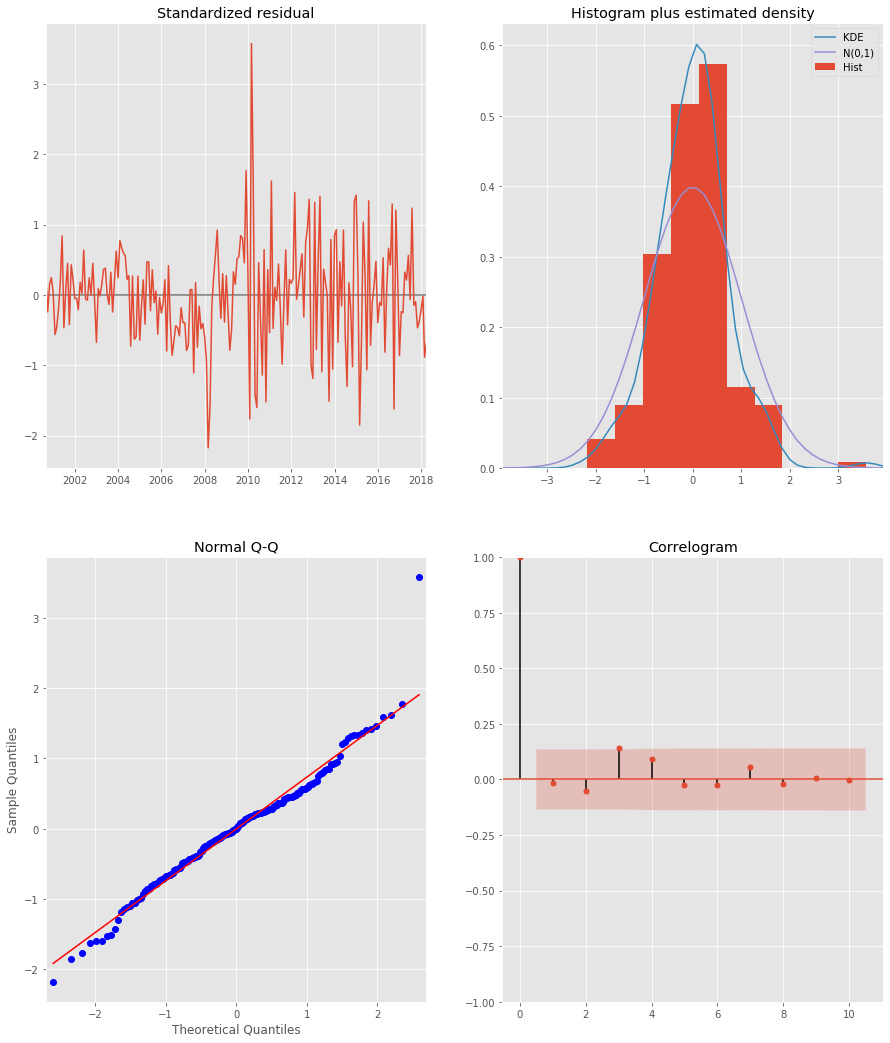

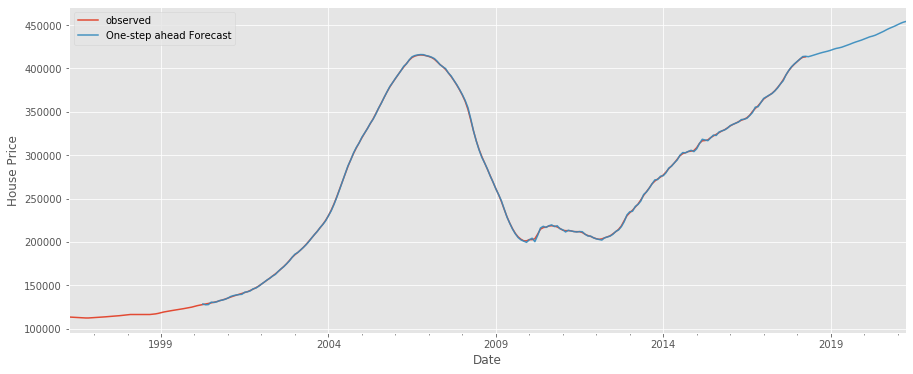

The Mean Squared error of our forecast is 502478.34

The Root Mean Squared error of our forecast is 708.86

The home value currently is 413400.0

The predicted home value in 3 years is 454202.1089251495

The predicted ROI in 3 years is 4.96%


 ------------------------------------------------------------------------ 
 
 


In [32]:
ROI = {}
RMSE = {}
Investment = {}
ROI2 = {}
for col in df2.columns:  
    print(f"Building model for {col}\n")
    print(">>>>>>>>>>>>>")
    # Plug the optimal parameter values into a new SARIMAX model
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df[col],
                                                    order=(2,1,3),
                                                seasonal_order=(1,1,3,12),
                                                    enforce_stationarity=False,enforce_invertibility=False)

        # Fit the model and print results
    output = ARIMA_MODEL.fit()

    print(output.summary().tables[1])

        # Call plot_diagnostics() on the results calculated above 
    output.plot_diagnostics(figsize=(15, 18))
    plt.show()

        # Get predictions starting from 01-01-1998 and calculate confidence intervals
    pred = output.get_prediction(start=pd.to_datetime('2000-04-01'),end = pd.to_datetime('2021-04-01'),dynamic=False)

        # Plot real vs predicted values along with confidence interval

    rcParams['figure.figsize'] = 15, 6

        # Plot observed values
    ax = df[col].plot(label='observed')

        # Plot predicted values
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)


        # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('House Price')
    plt.legend()
    plt.show()

        # Get the real and predicted values
    forecasted = pred.predicted_mean
    truth = df[col]['2000-04-01':]

        # Compute the mean square error
    mse = ((forecasted - truth)**2).mean()
    print(f"The Mean Squared error of our forecast is {round(mse,2)}\n")
    rmse = np.sqrt(mse)
    print(f"The Root Mean Squared error of our forecast is {round(rmse,2)}\n")
    
    print(f"The home value currently is {truth['2018-04-01']}\n")

    print(f"The predicted home value in 3 years is {forecasted['2021-04-01']}\n")

    print(f"The predicted ROI in 3 years is {round((forecasted['2021-04-01']-(truth['2018-04-01']*1.0468))/(truth['2018-04-01']*1.0468)*100,2)}%\n\n")
          
    print(" ------------------------------------------------------------------------ \n \n ")
          
    ROI[col] = (forecasted['2021-04-01']-(truth['2018-04-01']*1.0468))/(truth['2018-04-01']*1.0468)*100
    RMSE[col] = rmse
    ROI2[col] = (truth['2018-01-01']-(truth['2015-01-01']*1.06))/(truth['2015-01-01']*1.06)        

In [33]:
ROI

{'90037': 20.34872132421257,
 '90304': 17.790030104674724,
 '90813': 14.993548975694152,
 '90001': 10.556618179611386,
 '91768': 4.957858281101787}